# Nuwe Challenge - Random forest Classifier
* [Libraries](#libraries)
* [Data Loading](#data-loading)
* [EDA](#eda)
* [Model](#model)
* [Results](#results)

## Libraries <a class="anchor" id="libraries"></a>

In [24]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Data Loading<a class="anchor" id="data-loading"></a>

In [2]:
# importing data
train = pd.read_csv('data/j0002_train.csv')
test = pd.read_csv('data/j0002_X_test.csv')

print(f'Train shape: {train.shape}')
print(f'Train shape: {test.shape}')

Train shape: (2100, 7)
Train shape: (900, 6)


In [3]:
train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [103]:
test.head()

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


## EDA<a class="anchor" id="eda"></a>
### Target variable
Las __categorías de la variable objetivo están balanceadas__, por lo que no es necesario hacer ninguna preprocesado en este aspecto.

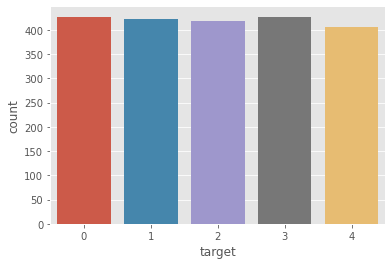

In [104]:
sns.countplot(x='target', data=train)
plt.show()

En un pairplot se observa que las combinaciones de la features permiten identificar las distintas etiquetas de la variable target aunque sin cortes limpios. También se observa cierta correlación entre la feature3 y la feature5.

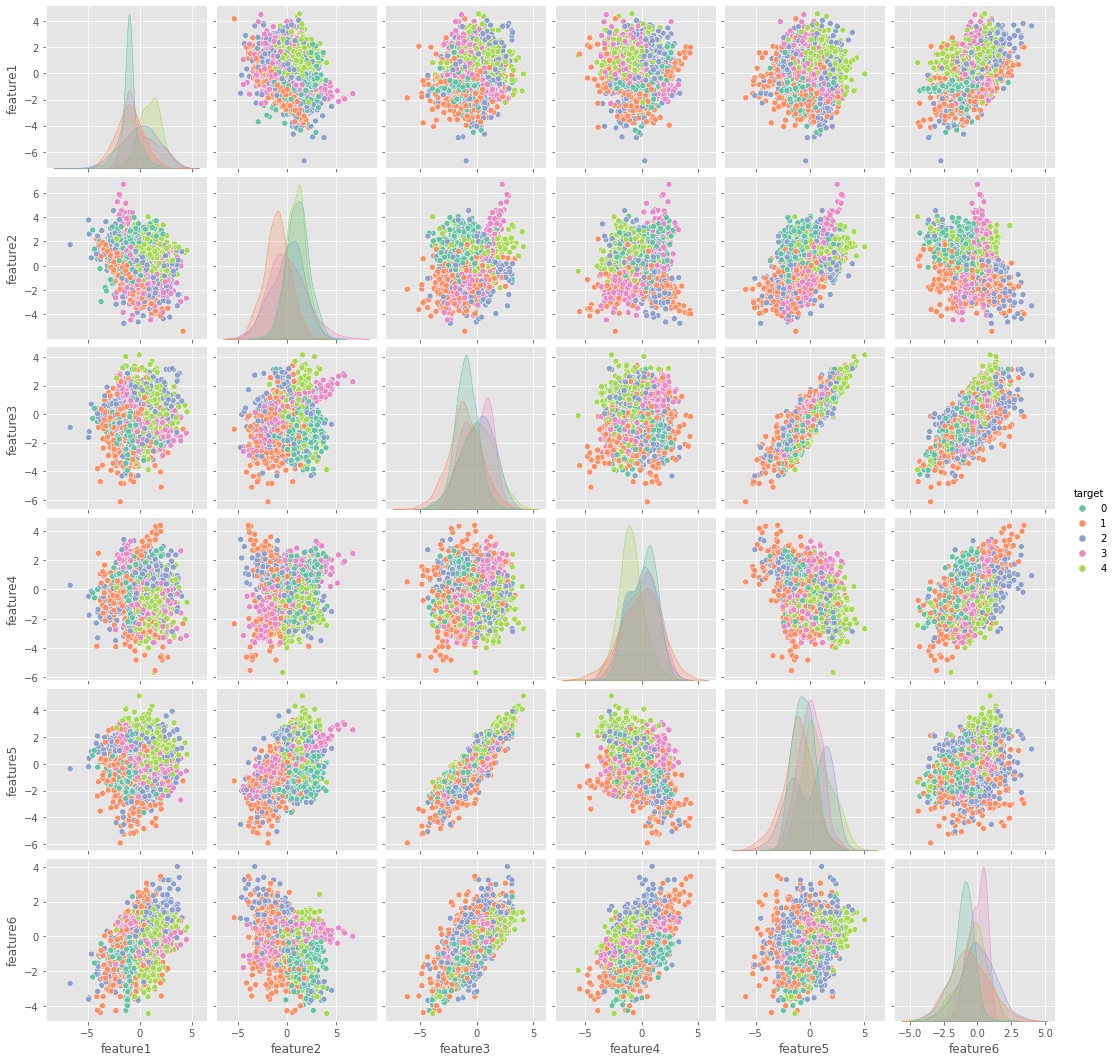

In [100]:
g = sns.pairplot(train, hue="target", palette="Set2", diag_kind="kde", height=2.5)

### Distribution test vs test
__La distribucción de las features en el conjunto de entreno y de test es similar__, por lo que el modelo que entrenemos se puede aplicar sobre el conjunto de test.

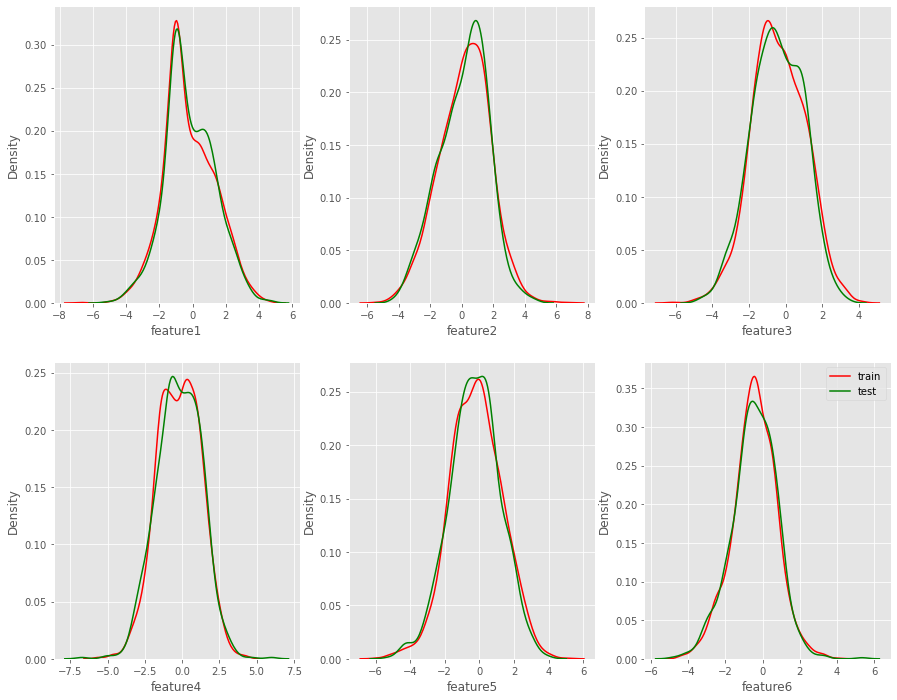

In [99]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,12))

for feature, ax in zip(features, axes.flat):
    sns.kdeplot(train[feature], shade=0, color='red', ax=ax,label='train')
    sns.kdeplot(test[feature], shade=0, color='green', ax=ax,label='test')
    
plt.legend()
plt.show()


In [110]:
train.drop(columns=['target']).describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324


In [106]:
test.describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.170339,0.135481,-0.447035,-0.201708,-0.263349,-0.445490
std,1.485402,1.547202,1.394437,1.487102,1.450823,1.215000
min,-5.084203,-4.292548,-4.628992,-6.732089,-5.196997,-4.823971
25%,-1.098759,-0.934171,-1.460497,-1.163163,-1.182667,-1.152891
50%,-0.386297,0.341427,-0.464239,-0.177710,-0.233699,-0.410182
75%,0.881170,1.246296,0.626893,0.870332,0.679282,0.399597
max,4.636012,4.612113,3.299946,5.996929,3.917118,5.357953


## Model<a class="anchor" id="model"></a>
Se entrena un modelo que se valida con el 20% del test de entreno. Según el set de validación el resultado esperado del F1 score es de 0.79.

In [4]:
X = train.drop(columns=['target'])
y = train.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [22]:
model = RandomForestClassifier(n_estimators=1000,
                               max_depth=12,
                               max_features=5,
                               n_jobs=-1,
                               random_state=42
                              )
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=5, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [30]:
print('Train set f1 score: ', f1_score(y_train, model.predict(X_train), average='macro'))
print('Validation set f1 score: ', f1_score(y_valid, model.predict(X_valid), average='macro'))

Train set f1 score:  0.9964294603484666
Validation set f1 score:  0.7933967249230782


In [29]:
print(confusion_matrix(y_valid, model.predict(X_valid)))
print()
print()
print(classification_report(y_valid, model.predict(X_valid)))

[[73  9  2  1  0]
 [ 4 64  5 11  1]
 [ 6  8 63  3  4]
 [ 2  5  3 67  8]
 [ 3  0  2 10 66]]


              precision    recall  f1-score   support

           0       0.83      0.86      0.84        85
           1       0.74      0.75      0.75        85
           2       0.84      0.75      0.79        84
           3       0.73      0.79      0.76        85
           4       0.84      0.81      0.82        81

    accuracy                           0.79       420
   macro avg       0.80      0.79      0.79       420
weighted avg       0.80      0.79      0.79       420



# Results<a class="anchor" id="results"></a>

In [37]:
pd.DataFrame(model.predict(test),
             columns=['results']).to_csv('results.csv',index=False)